# PROYECTO PARA FAIRPLAY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib qt

## LEYENDO BASE "WINE QUALITY"

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, sep =';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.isna().sum() #Checando missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EXPLORANDO VARIABLES

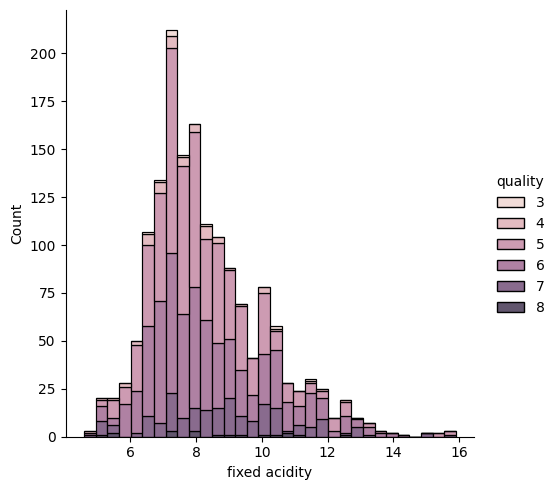

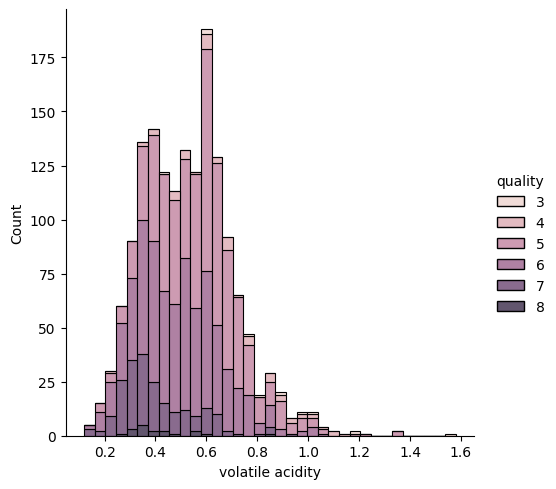

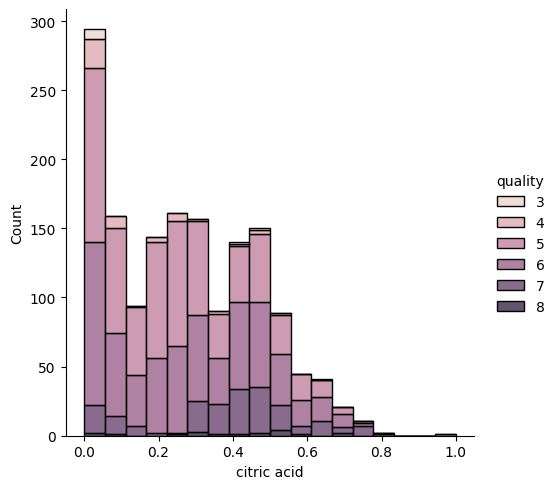

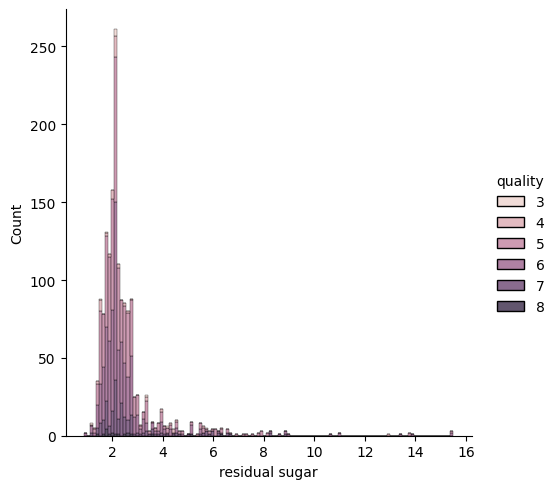

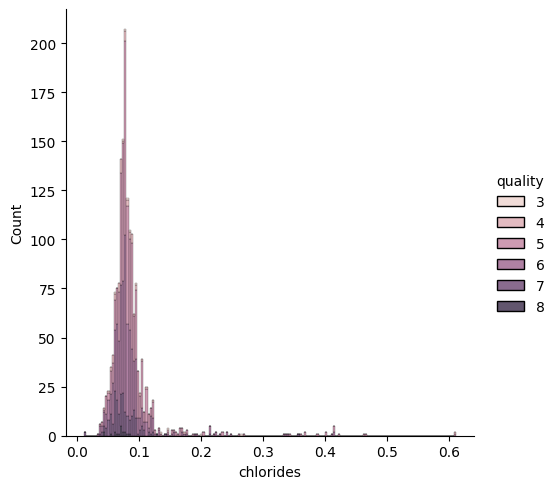

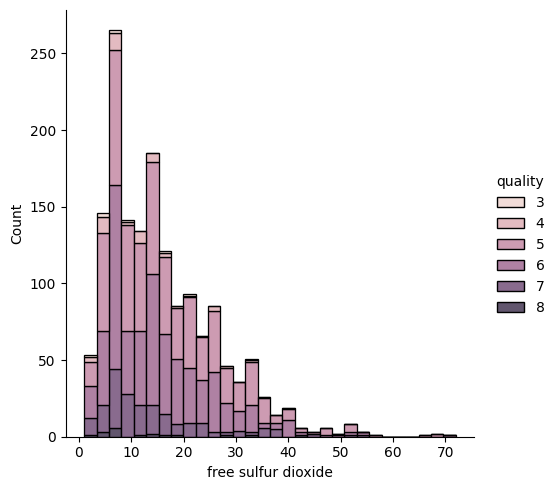

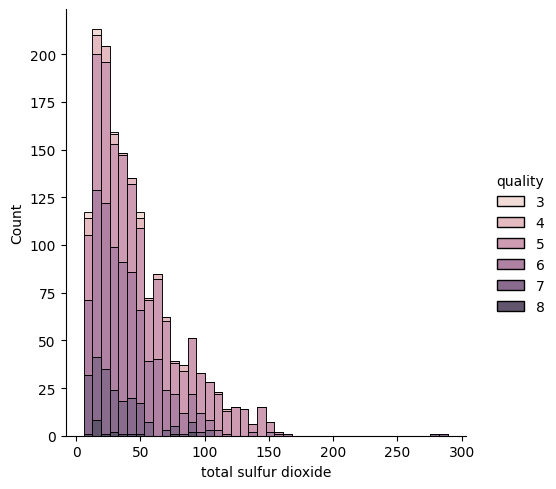

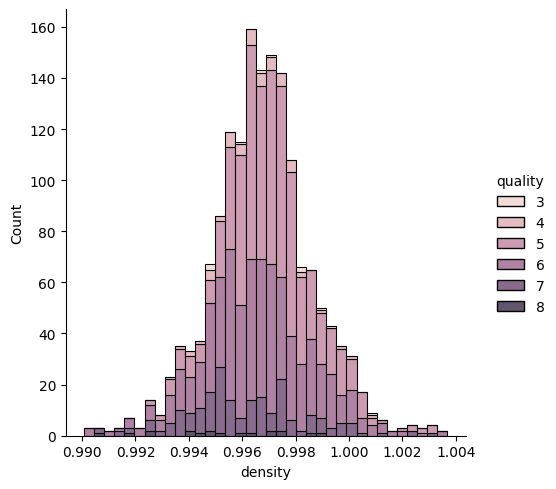

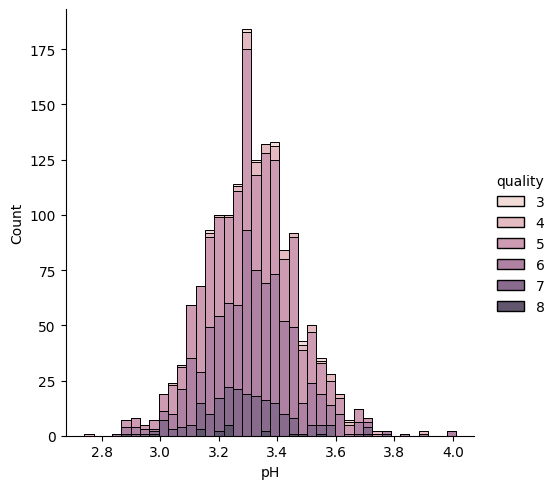

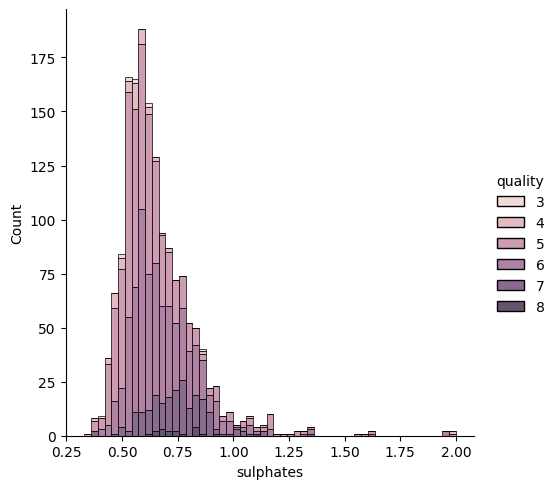

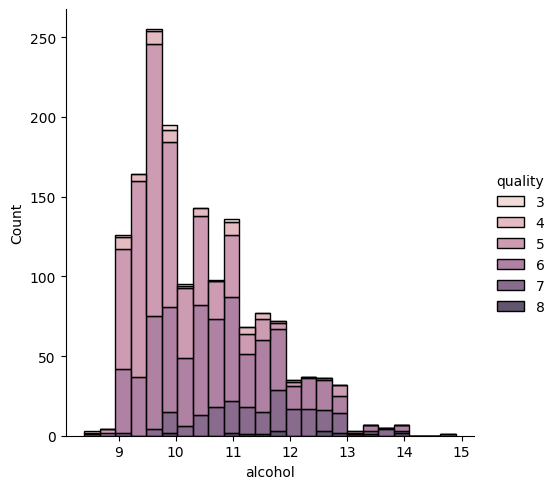

In [7]:
variables = wine.drop(columns = 'quality',
                      axis = 1)\
                        .columns
for x in variables:
    sns.displot(data = wine,
                x = x,
                hue = 'quality',
                multiple = 'stack');

**SE PUEDE OBSERVAR QUE HAY SUFICIENTES CASOS PARA APROXIMARSE COMO UN PROBLEMA DE ML. SE TOMARÁ UNA CALIDAD IGUAL O MAYOR A 6 COMO UNA BUENA CALIDAD. LOS CASOS ATÍPICOS SON MÍNIMOS**

<Axes: >

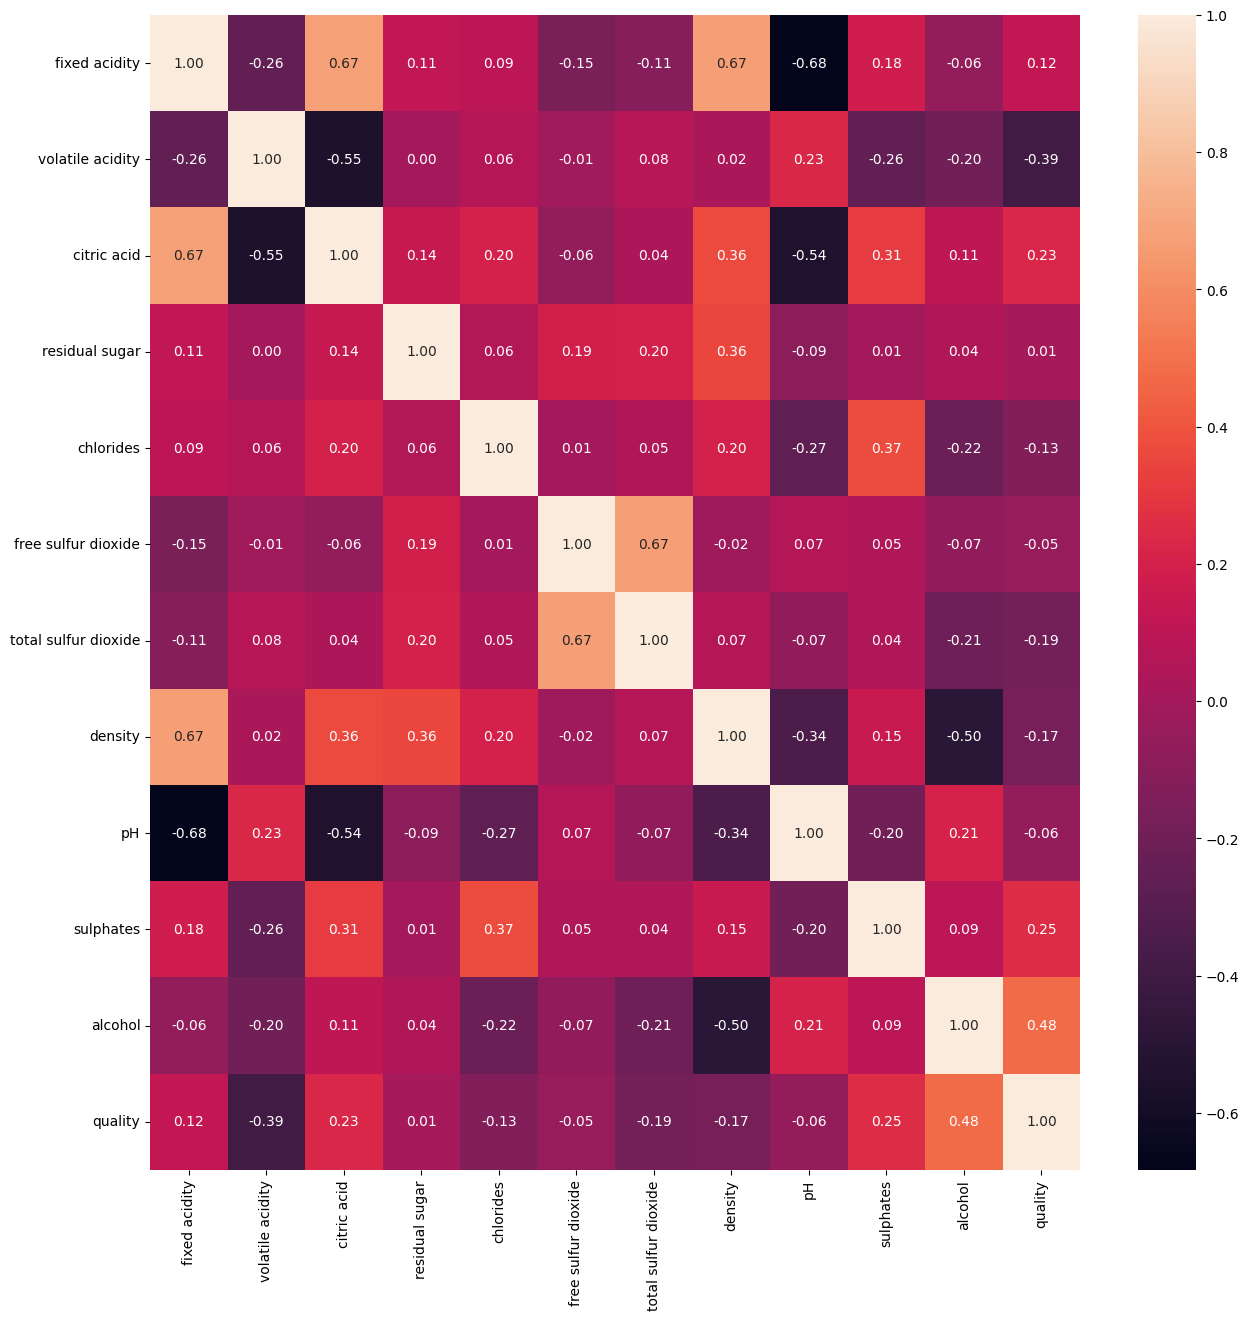

In [6]:
size = (15,15)
wc = wine.corr()
plt.figure(figsize = size)
sns.heatmap(data = wc,
            annot = True,
            fmt = '.2f')

## PREPARANDO LOS SUBCONJUNTOS DE DATOS PARA ML

In [21]:
# Separando "buenos" y "malos"
cdrops = ['quality','bueno']
wine['bueno'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine_feat = wine.drop(columns = cdrops,
                      axis = 1)
wine_tar = wine['bueno']

In [9]:
# Proporción de buenos
wine['bueno'].value_counts()

bueno
0    1382
1     217
Name: count, dtype: int64

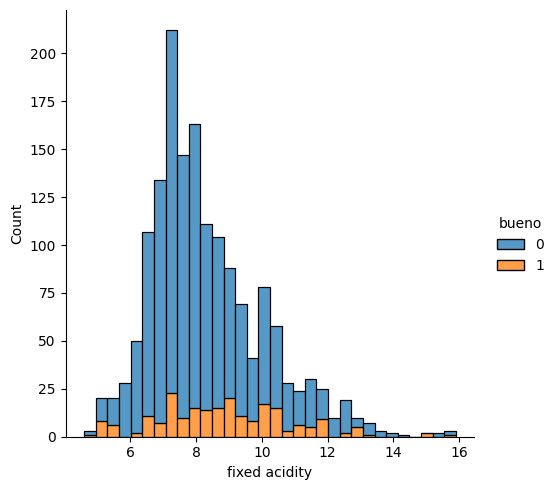

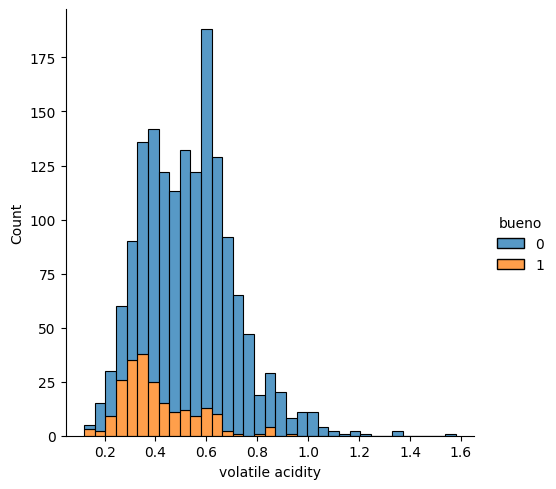

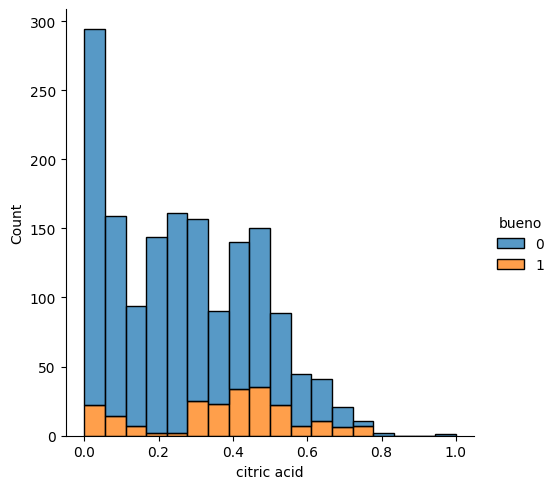

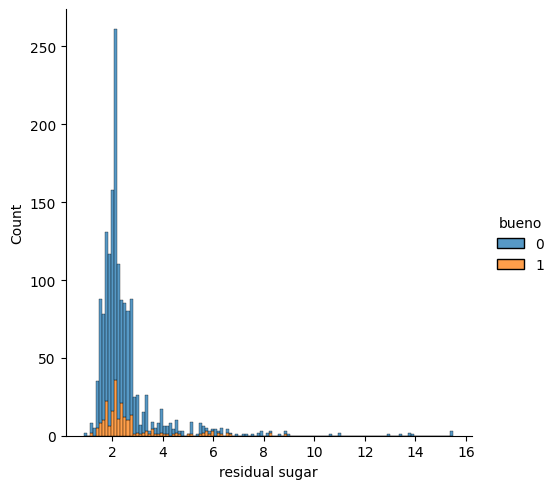

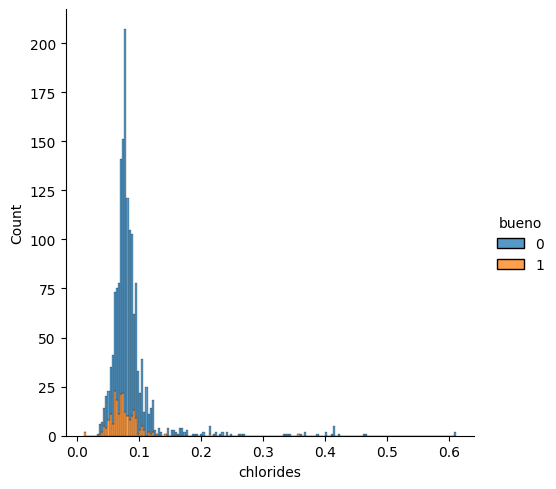

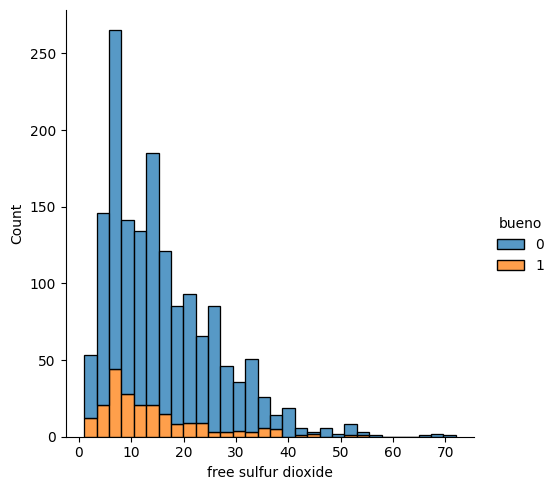

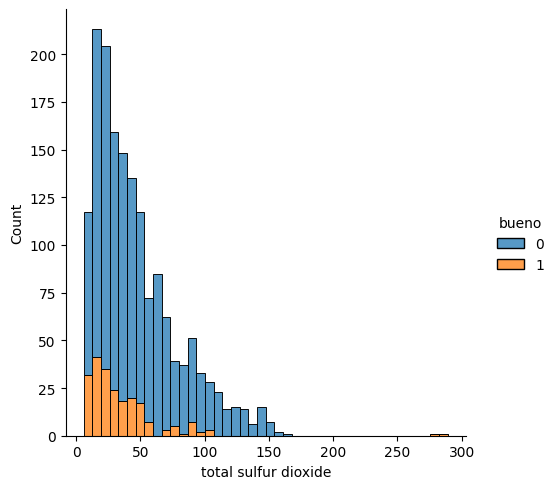

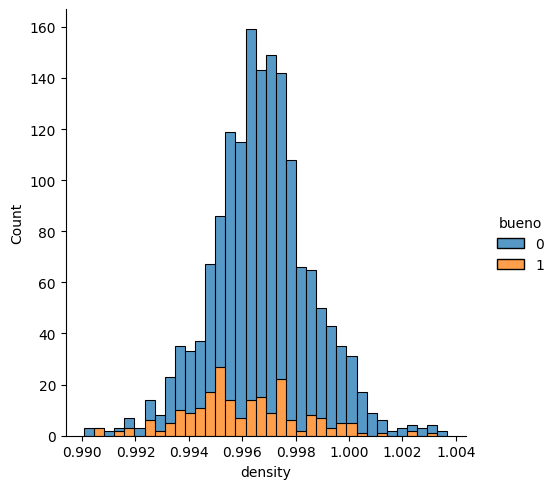

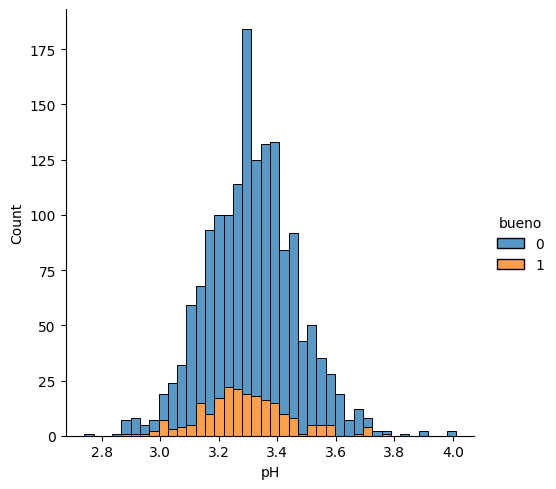

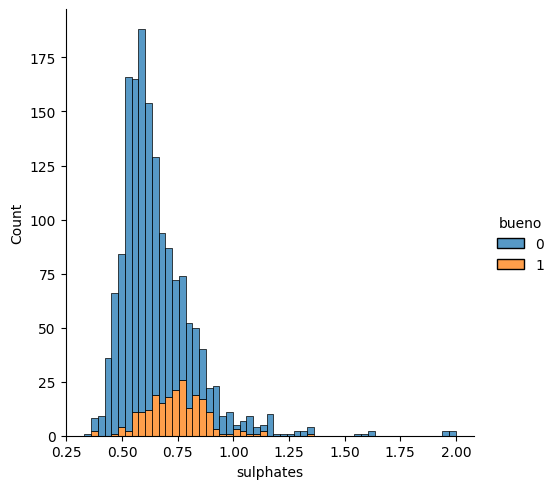

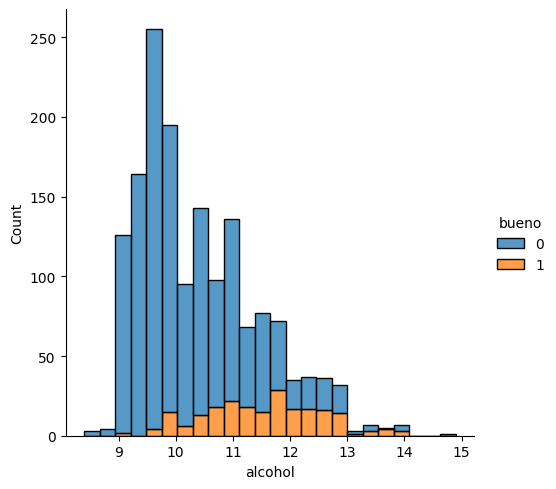

In [11]:
no_qual = wine.drop('quality',
                    axis = 1)
variables = wine.drop(columns = cdrops,
                      axis = 1)\
                        .columns
for x in variables:
    sns.displot(data = no_qual,
                x = x,
                hue = 'bueno',
                multiple = 'stack'); #Con Target dicotómico

In [22]:
# Estandarizando variables para evitar influencia de escala
from sklearn.preprocessing import StandardScaler
wine_features = wine_feat
wine_feat = StandardScaler().fit_transform(wine_feat)

In [23]:
# Separando en entrenamiento y prueba
from sklearn.model_selection import train_test_split
feat_train, feat_test, tar_train, tar_test = train_test_split(wine_feat, wine_tar, test_size=.25)

## MODELO 1: ÁRBOL DE DECISIÓN

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
modelo_1 = DecisionTreeClassifier(random_state = 0, max_leaf_nodes = 5)
m_1 = modelo_1.fit(feat_train, tar_train)
tar_pred_m1 = modelo_1.predict(feat_test)
print(classification_report(tar_test, tar_pred_m1)) #print para que salga bonito

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       358
           1       0.55      0.26      0.35        42

    accuracy                           0.90       400
   macro avg       0.73      0.62      0.65       400
weighted avg       0.88      0.90      0.88       400



[Text(0.5555555555555556, 0.875, 'x[10] <= 1.058\ngini = 0.249\nsamples = 1199\nvalue = [1024, 175]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= -0.924\ngini = 0.157\nsamples = 1002\nvalue = [916, 86]'),
 Text(0.2222222222222222, 0.375, 'x[10] <= 0.025\ngini = 0.401\nsamples = 166\nvalue = [120, 46]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.214\nsamples = 82\nvalue = [72, 10]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.49\nsamples = 84\nvalue = [48, 36]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.091\nsamples = 836\nvalue = [796, 40]'),
 Text(0.7777777777777778, 0.625, 'x[9] <= 0.158\ngini = 0.495\nsamples = 197\nvalue = [108, 89]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.368\nsamples = 103\nvalue = [78, 25]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.435\nsamples = 94\nvalue = [30, 64]')]

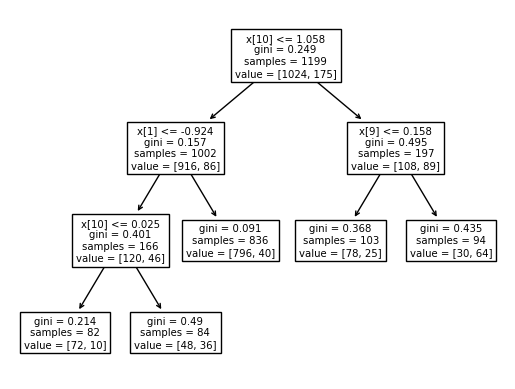

In [29]:
from sklearn import tree
tree.plot_tree(m_1)

In [30]:
wine_features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [31]:
from sklearn.inspection import permutation_importance
result_1 = permutation_importance(m_1, feat_train, tar_train)

In [32]:
tree_import = pd.Series(result_1.importances_mean, index = wine_features.columns)

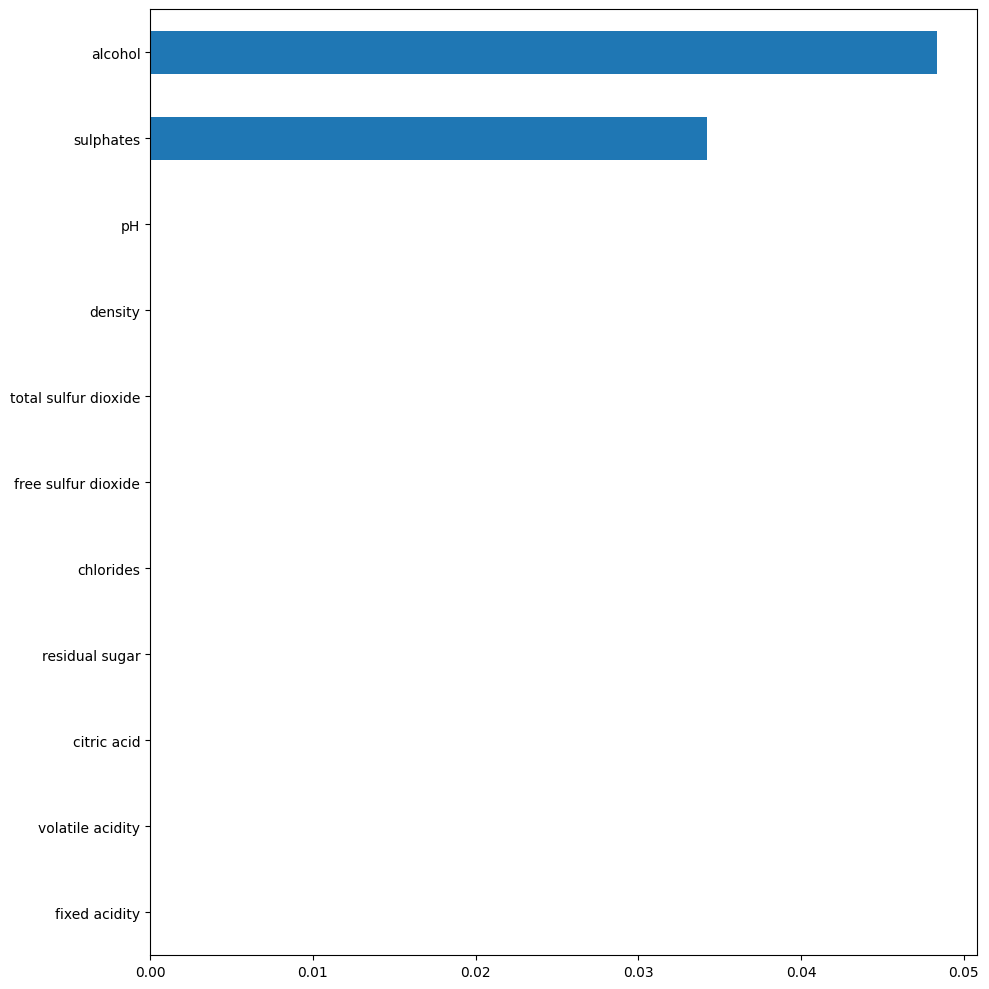

In [33]:
fig, ax = plt.subplots()
tree_import.nsmallest(11).plot(kind = 'barh', ax = ax, figsize = (10,10))
fig.tight_layout()
plt.show()

## MODELO 2: RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier
modelo_2 = RandomForestClassifier(random_state=1)
m_2 = modelo_2.fit(feat_train, tar_train)
tar_pred_m2 = modelo_2.predict(feat_test)
print(classification_report(tar_test, tar_pred_m2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       358
           1       0.63      0.45      0.53        42

    accuracy                           0.92       400
   macro avg       0.79      0.71      0.74       400
weighted avg       0.91      0.92      0.91       400



<Axes: >

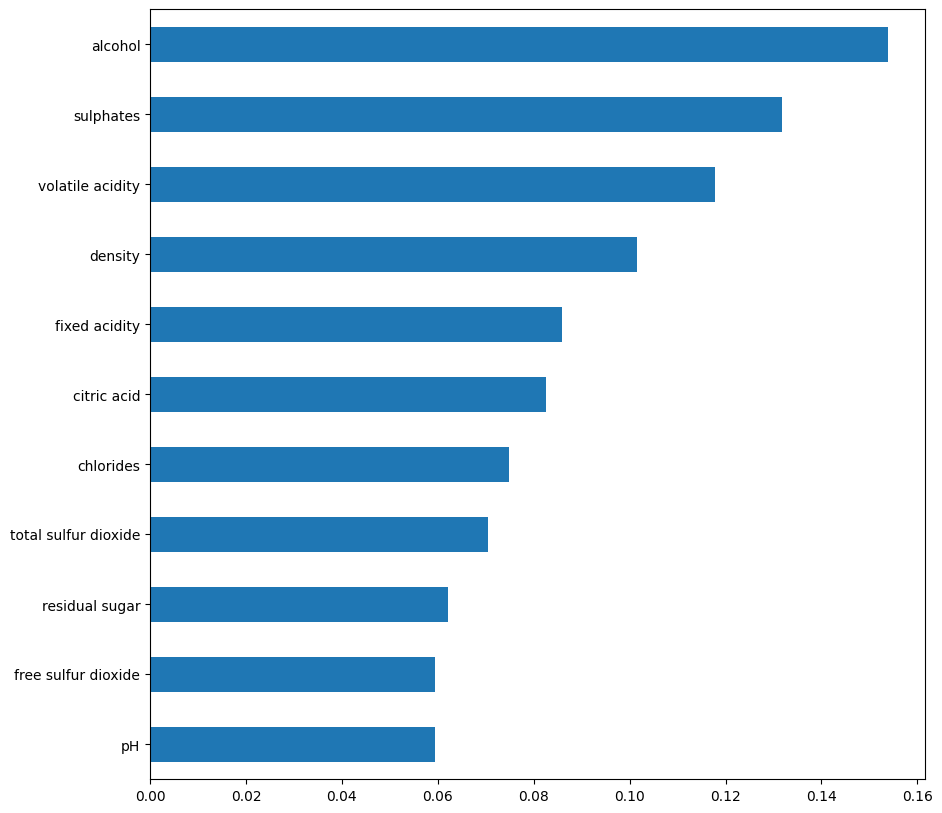

In [35]:
feat_imp = pd.Series(modelo_2.feature_importances_, index = wine_features.columns)
feat_imp.nsmallest(11).plot(kind = 'barh', figsize = (10,10))

## MODELO 3: XGBOOST

In [36]:
import xgboost as xgb
modelo_3 = xgb.XGBClassifier(random_state = 0)
mod_3 = modelo_3.fit(feat_train, tar_train)
tar_pred_m3 = modelo_3.predict(feat_test)
print(classification_report(tar_test, tar_pred_m3))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       358
           1       0.65      0.52      0.58        42

    accuracy                           0.92       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.91      0.92      0.92       400



<Axes: >

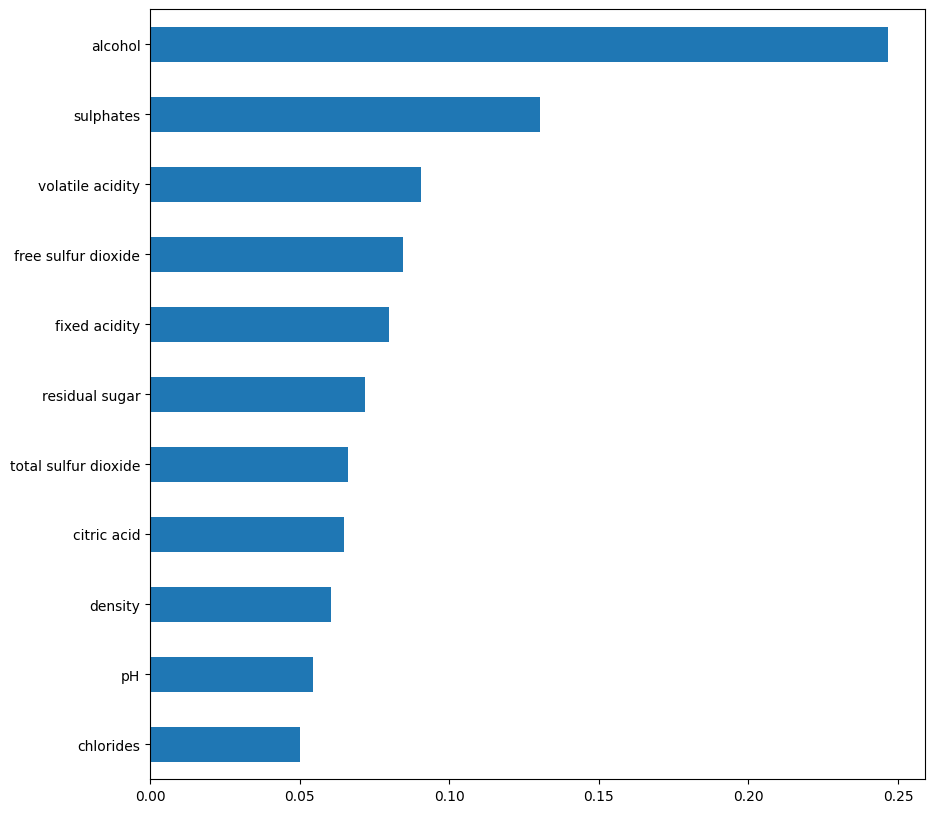

In [37]:
feat_imp = pd.Series(modelo_3.feature_importances_, index = wine_features.columns)
feat_imp.nsmallest(11).plot(kind = 'barh', figsize = (10,10))

## BUENOS Y MALOS VINOS

In [38]:
pd.options.display.float_format = '{:.2f}'.format

In [39]:
# LOS BUENOS VINOS
wine_buen = wine[wine['bueno'] == 1]
wine_buen[['alcohol', 'volatile acidity', 'sulphates']].describe()

,alcohol,volatile acidity,sulphates
count,217.00,217.00,217.00
mean,11.52,0.41,0.74
std,1.00,0.14,0.13
min,9.20,0.12,0.39
25%,10.80,0.30,0.65
50%,11.60,0.37,0.74
75%,12.20,0.49,0.82
max,14.00,0.92,1.36


In [40]:
# lOS MALOS VINOS
wine_malo = wine[wine['bueno'] == 0]
wine_malo[['alcohol', 'volatile acidity', 'sulphates']].describe()

,alcohol,volatile acidity,sulphates
count,1382.00,1382.00,1382.00
mean,10.25,0.55,0.64
std,0.97,0.18,0.17
min,8.40,0.16,0.33
25%,9.50,0.42,0.54
50%,10.00,0.54,0.60
75%,10.90,0.65,0.70
max,14.90,1.58,2.00


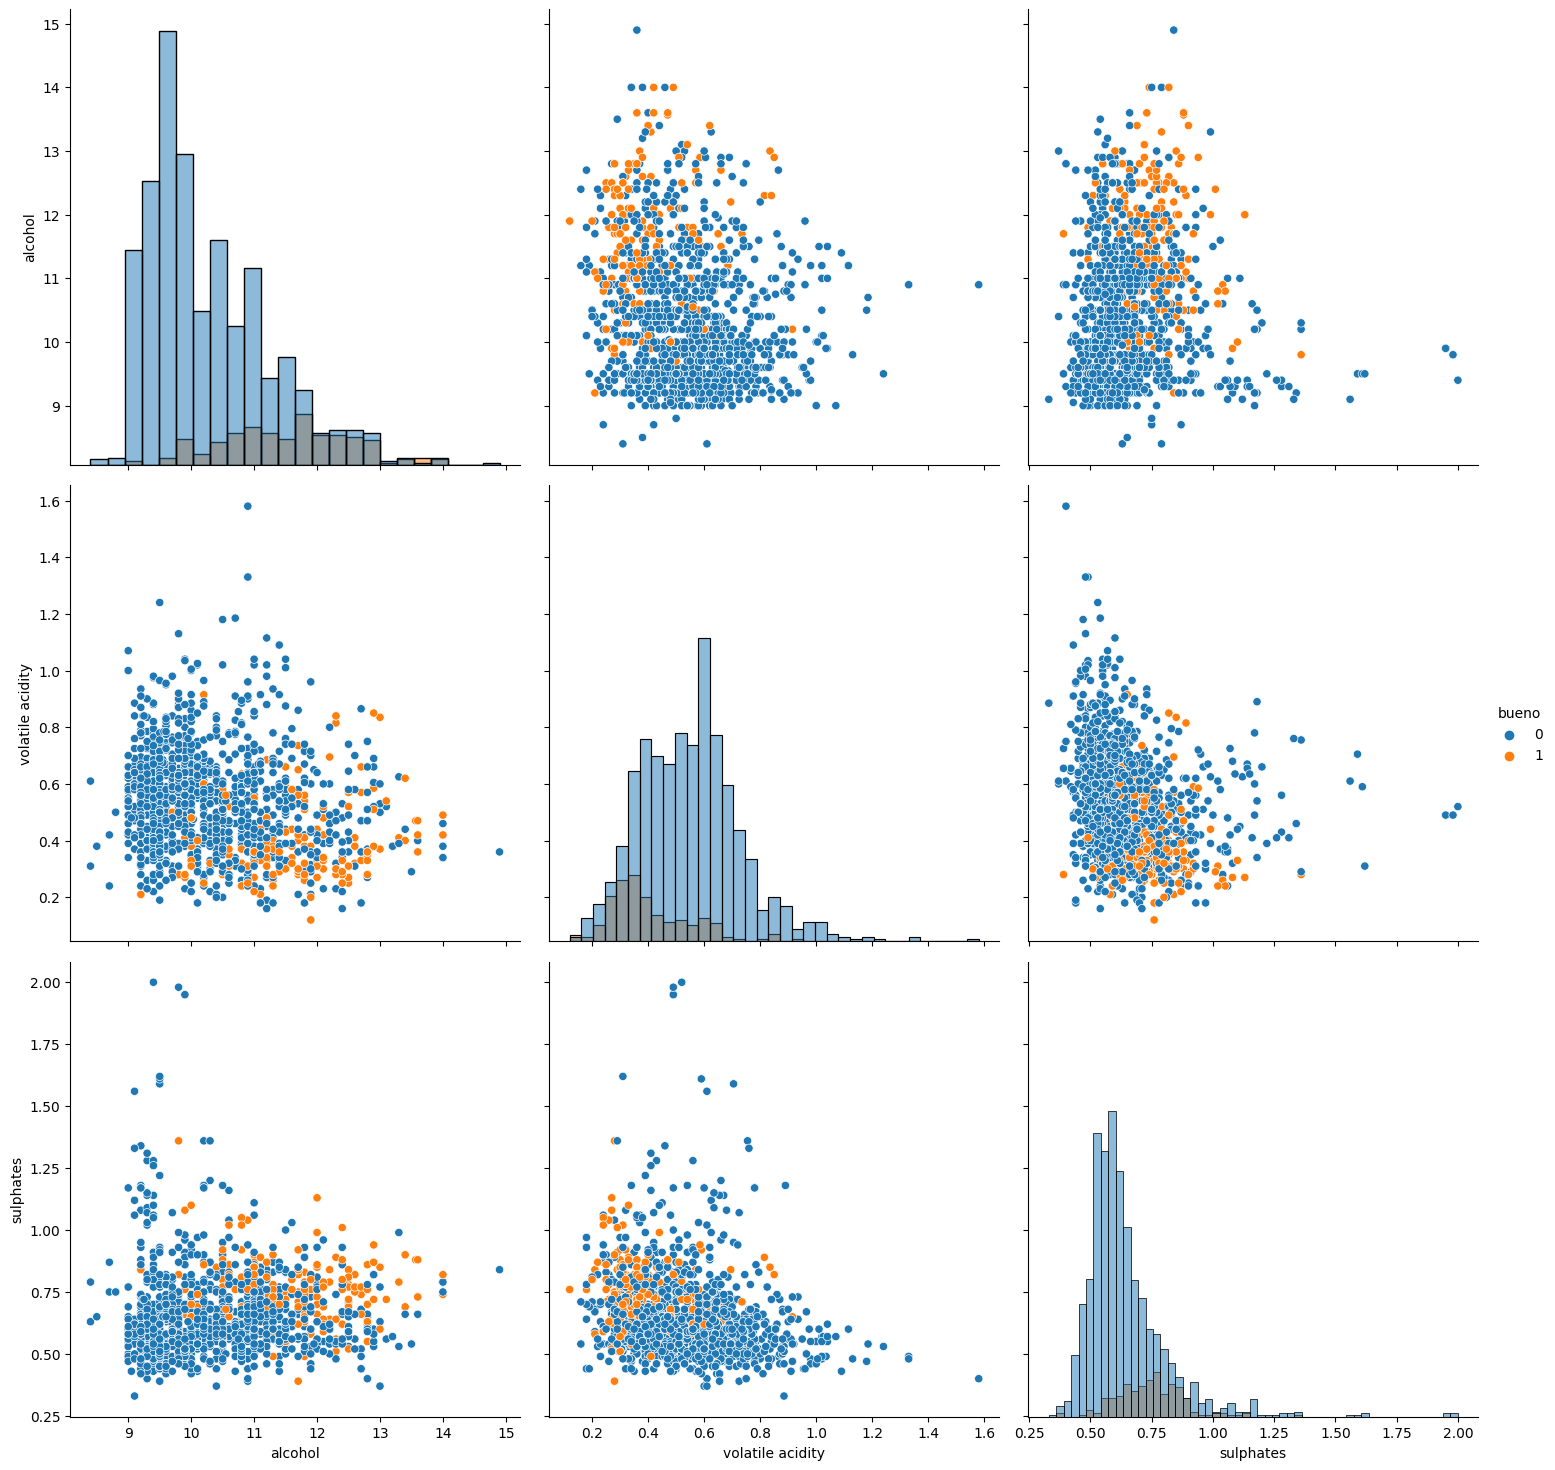

In [42]:
red_wine = wine[['alcohol', 'volatile acidity', 'sulphates', 'bueno']]
g = sns.PairGrid(red_wine, hue = 'bueno', height = 5, aspect = 1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()